# Project 3: Customer Segmentation

This notebook demonstrates a complete unsupervised learning project. The goal is to identify distinct segments or groups of customers based on their attributes (like income and spending habits). This is a clustering task.

### 1. Data Generation
We will create synthetic data that mimics customer data with distinct groups.

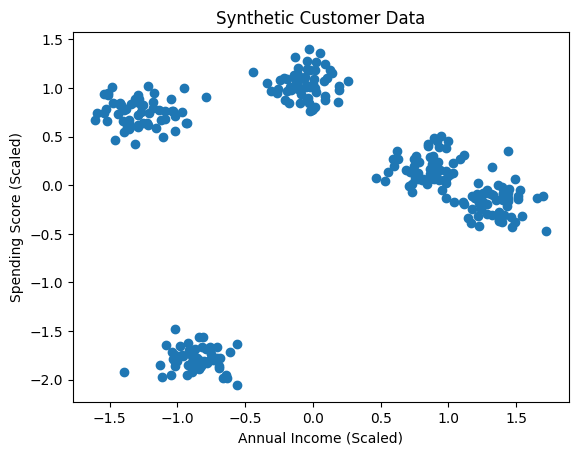

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=5, 
                  cluster_std=0.8, random_state=42)

# Scale the data as k-Means is distance-based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title('Synthetic Customer Data')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

### 2. Finding the Optimal Number of Clusters
We use the Elbow Method to determine the best 'k' for our k-Means model.

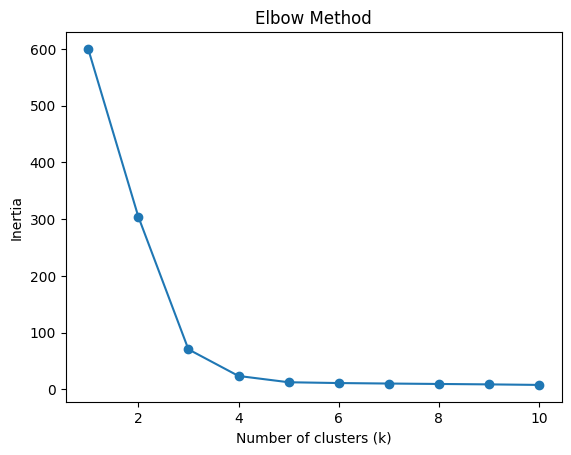

The elbow is clearly at k=5, which matches how we generated the data.


In [2]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("The elbow is clearly at k=5, which matches how we generated the data.")

### 3. Model Training and Visualization

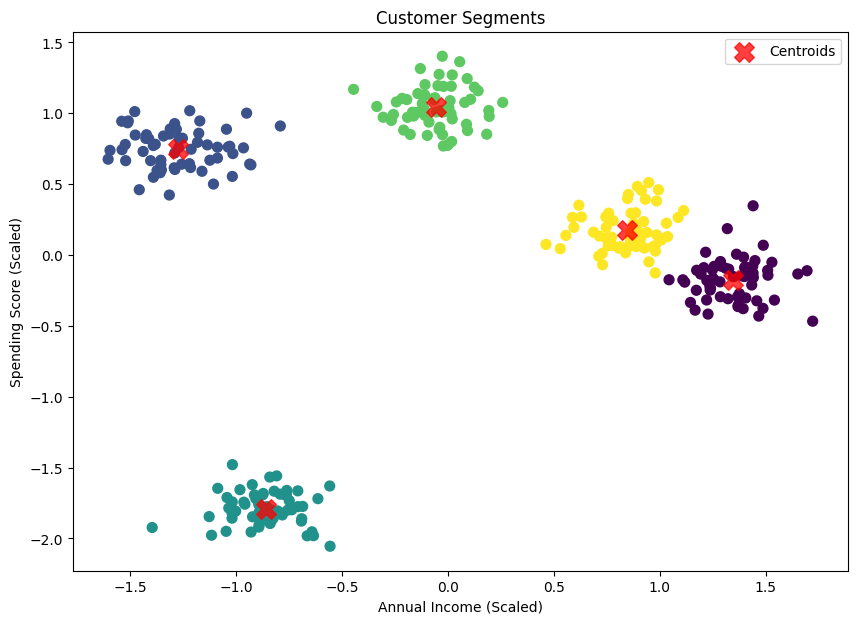

In [3]:
# Train the model with the optimal k
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

### 4. Analysis
With the clusters identified, a business could now analyze the characteristics of each group. For example, they could look at the average income and spending score for each cluster to create targeted marketing campaigns.

- **Cluster 0**: Low income, low spending.
- **Cluster 1**: High income, high spending.
- etc.